In [164]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import gridspec
import pandas as pd

In [165]:
with open('pulse.RM.zoom.paprof', newline='') as fil: 
    read = csv.reader(fil, delimiter=' ')
    x = []
    r3 = [] 
    r4 = [] 
    r5 = [] 
    r6 = []
    pa = []
    paerr = []
    for row in read: 
        x.append(row[2])
        r3.append(row[3]) 
        r4.append(row[4])
        r5.append(row[5])
        r6.append(row[6])
        pa.append(row[-2]) 
        paerr.append(row[-1])

In [166]:
#Subfactor for subbanding
subfac = 1
#Crop Channels
nymin = 240//subfac
nymax = -100//subfac
#Crop Bins
nxmin = 175
nxmax = 215

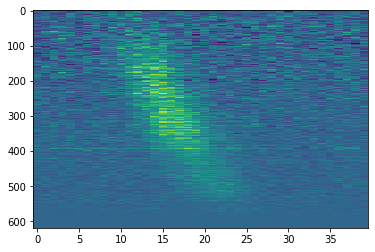

In [167]:
npy = np.load('B_686_dm348.8.tbin256fchn960.fits.npy')
sub_npy = np.nanmean(npy.reshape(-1, subfac, npy.shape[1]), axis=1)
plt.imshow(sub_npy[nymin:nymax, nxmin:nxmax], interpolation = None, aspect = 'auto')

In [168]:
tres = 83.333/npy.shape[1]
fres = 400/npy.shape[0]
sfres = 400/sub_npy.shape[0]

print(tres)
print(fres)
print(sfres)

0.32551953125
0.4166666666666667
0.4166666666666667


In [169]:
x.pop(0)
r3.pop(0)
r4.pop(0)
r5.pop(0)
r6.pop(0)
pa.pop(0)
paerr.pop(0)

x     = [float(i) for i in        x[nxmin:nxmax]]
r3    = [float(i)*1e3 for i in   r3[nxmin:nxmax]]
#r3 = sub_npy[nymin:nymax, nxmin:nxmax].sum(0) * 1e-4
r4    = [float(i)*1e3 for i in   r4[nxmin:nxmax]]
r5    = [float(i)*1e3 for i in   r5[nxmin:nxmax]]
r6    = [float(i)*1e3 for i in   r6[nxmin:nxmax]]
pa    = [float(i) for i in       pa[nxmin:nxmax]]
paerr = [float(i) for i in    paerr[nxmin:nxmax]]

l = []
for i in range(len(r5)):
    l.append(np.sqrt(pow(r4[i],2)+pow(r5[i],2)))


In [170]:
pa_nan = np.asarray([np.nan if x == 0.0 else x for x in pa])
pa_nonan = []
for i in pa:
    if i != 0.0:
        pa_nonan.append(i) 
paerr_nan = np.asarray([np.nan if x == 0.0 else x for x in paerr])
paerr_nonan = []
for i in paerr:
    if i != 0.0:
        paerr_nonan.append(i) 

In [171]:
paavg = np.average(pa_nonan, weights = [(1/(i**2)) for i in paerr_nonan])
paavg_unc = np.mean(paerr_nonan)

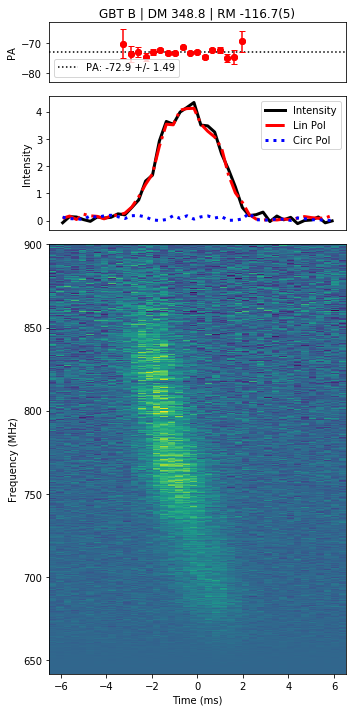

In [177]:
fig = plt.figure(figsize = (5, 10))
gs = fig.add_gridspec(9, 1)
ax1 = fig.add_subplot(gs[0, 0])
plt.scatter(x, pa_nan, c = 'r', marker = 'o', linewidths = 1)
plt.errorbar(x, pa_nan, yerr=paerr_nan, c = 'r', fmt = 'o', capsize = 3)
paavg_round = str('%s' % float('%.3g' % paavg))
paavg_unc_round = str('%s' % float('%.3g' % paavg_unc))
plt.hlines(paavg, xmin = nxmin, xmax = nxmax, \
           color = 'k', linestyles = 'dotted', \
           label = 'PA: ' + str(paavg_round) + ' +/- ' + str(paavg_unc_round))
plt.xlim(nxmin, nxmax)
plt.ylim(paavg-10, paavg+10)
plt.ylabel('PA')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('GBT B | DM 348.8 | RM -116.7(5)')
plt.legend()
ax2 = fig.add_subplot(gs[1:3, 0])
plt.plot(x, r3, c = 'k', linewidth = 3, label = 'Intensity')
#plt.plot(x, np.abs(r4), linestyle = 'dashed')
#plt.plot(x, np.abs(r5), linestyle = 'dashdot')
plt.plot(x, np.abs(l), c = 'r', linewidth = 3, linestyle = 'dashdot', label = 'Lin Pol')
plt.plot(x, np.abs(r6), c = 'b', linewidth = 3, linestyle = 'dotted', label = 'Circ Pol')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Intensity')
plt.legend()
ax3 = fig.add_subplot(gs[-6:, 0])
twidth = (nxmax - nxmin)*tres
specwidth = (((960//subfac - np.abs(nymax)) - nymin))*fres
spec_lowbound = (960//subfac - np.abs(nymax))*fres - 1000#mhz
spec_upbound = spec_lowbound - specwidth
plt.imshow(sub_npy[nymin:nymax, nxmin:nxmax], extent = [-twidth/2, twidth/2, np.abs(spec_lowbound), np.abs(spec_upbound)]\
           , interpolation = None, aspect = 'auto')
#plt.xticks(tlabellocs, tlabels)
#plt.yticks(flabellocs_c, flabels_c)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.tight_layout()
plt.show()
fig.savefig('B_rm116_PAfit.png')

In [178]:
print(spec_lowbound)
print(spec_upbound)
print(twidth)
print(specwidth)

-641.6666666666666
-900.0
13.020781249999999
258.33333333333337
